__OVERSTIMULATION BEHAVIOR ANALYSIS__

__Project Definition & Preliminary Analysis__

_Project Definition_

__Title__: Overstimulation Behavior and Lifestyle Analysis

__Objective__: Utilizing the "overstimulation_dataset.csv", this projects aims to analyze how various lifestyle factors influence overstimulation behaviors. The goal is to identify patterns and correlations that can informa strategies for managing overstimulation.

__Key Research Questions__:
1. Which lifestyle factors are most strongly associated with overstimulation behaviours?
2. Are there identifiable patterns or trends in overstimulation incidents across different demographics?
3. Is overstimulation a risk factor for depression? 
4. Can we develop a predictive model to anticipate overstimulation episodes based on lifestyle data?
5. Can recommendations be made for daily habits and lifestyle hygiene that can minimize the risk of overstimulation and improve an individual's mental health?
6. Is there a correlation between excessive stress and overstimulation and symptoms of depression?

__Dataset Overview__:

Source: Overstimulation Behavior and Lifestyle Dataset from Kaggle (https://www.kaggle.com/datasets/miadul/overstimulation-behavior-and-lifestyle-dataset/data)

File: "overstimulation_dataset.csv"

Features:
1. Demographics
- Age: Age of the individual (18-60)
2. Lifestyle & Daily Routine
- Sleep_Hours: Hours of sleep per day (3-10)
- Screen_Time: Screen time per day (1-12)
- Work_Hours: Hours worked per day (4-15)
- Exercise_Hours: Hours of physical activity per day(0-3)
- Caffeine_Intake: Number of cups of caffeinated drinks(0-5)
- Tech_Usage_Hours: Total hours spent using technology per day (1-10)
3. Environmental Exposure
- Noise_Exposure: Frequency of exposure to high noise (0-5)
- Social_Interaction: Number of daily social interactions (0-10)
4. Mental Health & Psychological Traits
- Stress_Level: Self-reported stress level (1=low stress, 10=high stress)
- Anxiety_Score: Anxiety score (1-10)
- Depression_Score: Depression score (1-10)
- Overthinking_Score: Tendency to overthink (1-10)
- Irritability_Score: Irritability (1-10)
- Sensory_Sensitivity: Sensitivity to sensory input(0 = low sensitivity, 4 = high sensitivity)
- Headache_Frequency: Headaches per week
5. Habits & Coping Mechanisms
- Multitasking_Habit: Whether the person tends to multitask (1 = Yes, 0 = No)
- Meditation_Habit: Whether the person practices meditation/mindfulness (1 = Yes, 0 = No)
- Sleep_Quality: Quality of sleep (1-4)
6. Target Variable
- Overstimulated: 1 = Yes, 0 = No

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:

# ## Wczytanie danych


In [7]:
#%% Cell
data = pd.read_csv('overstimulation_dataset.csv')
data.head()


,Age,Sleep_Hours,Screen_Time,Stress_Level,Noise_Exposure,Social_Interaction,Work_Hours,Exercise_Hours,Caffeine_Intake,Multitasking_Habit,Anxiety_Score,Depression_Score,Sensory_Sensitivity,Meditation_Habit,Overthinking_Score,Irritability_Score,Headache_Frequency,Sleep_Quality,Tech_Usage_Hours,Overstimulated
0,56,7.767825,4.908517,2,0,8,11,2.054411,4,0,6,8,3,1,1,8,1,2,8.746524,0
1,46,4.270068,8.413936,9,4,4,10,2.513216,3,1,4,4,2,1,5,5,2,4,8.508448,1
2,32,6.676144,1.688213,5,2,8,12,2.123108,2,1,4,3,2,1,8,7,2,4,5.701592,0
3,25,7.963324,3.315576,7,2,8,13,1.217663,3,1,3,4,0,1,4,4,2,1,9.131087,0
4,38,3.748138,9.899260,5,0,5,4,0.093407,4,0,9,4,0,1,2,9,5,3,2.286433,1


In [ ]:

# ## Przygotowanie danych do modelowania

In [9]:
#%% Cell
X = data.drop('Overstimulated', axis=1)
y = data['Overstimulated']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

# ## Tworzenie i trenowanie modelu XGBoost

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Najpierw skalowanie danych
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Trening modelu KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [ ]:

# ## Ewaluacja modelu

In [ ]:

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.11      0.19       137
           1       0.68      0.97      0.80       263

    accuracy                           0.68       400
   macro avg       0.68      0.54      0.49       400
weighted avg       0.68      0.68      0.59       400



/home/udev/sources/repos/venv_kurs/venv_kurs/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [ ]:

# ## Macierz błędów

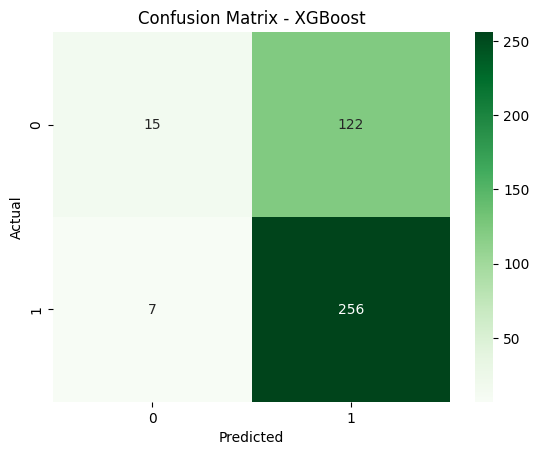

In [ ]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()

In [ ]:

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.70      0.72      0.71       137
           1       0.85      0.84      0.84       263

    accuracy                           0.80       400
   macro avg       0.77      0.78      0.77       400
weighted avg       0.80      0.80      0.80       400



In [ ]:
# ## Ważność cech

/tmp/ipykernel_4934/864308158.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')


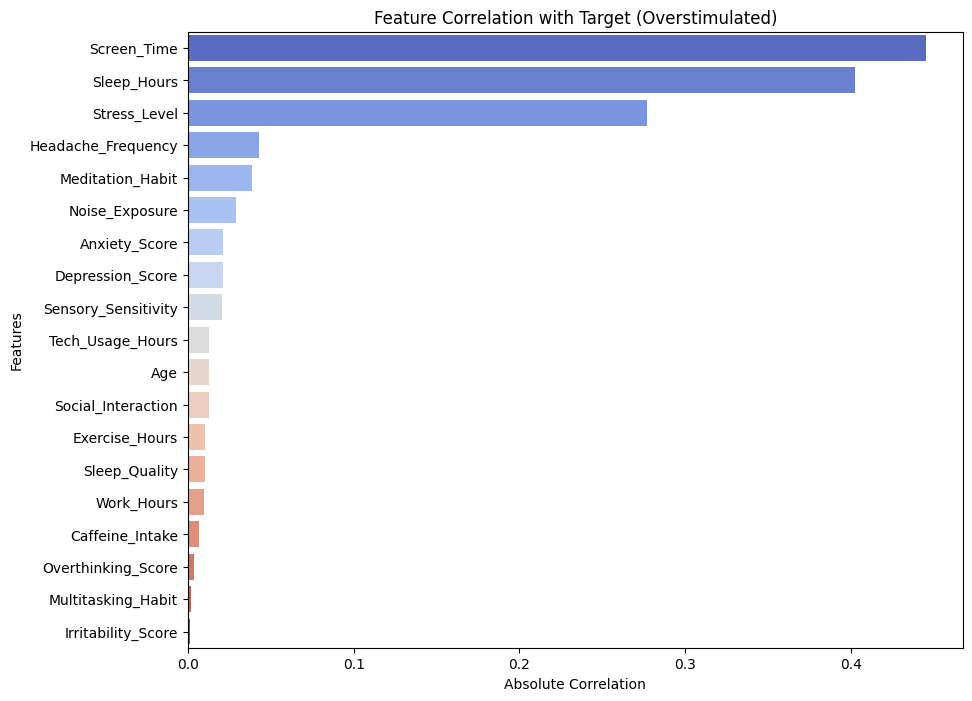

In [ ]:

# ## Korelacja cech z klasą docelową (Overstimulated)

correlations = data.corr()['Overstimulated'].drop('Overstimulated')
correlations = correlations.abs().sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Feature Correlation with Target (Overstimulated)')
plt.xlabel('Absolute Correlation')
plt.ylabel('Features')
plt.show()
